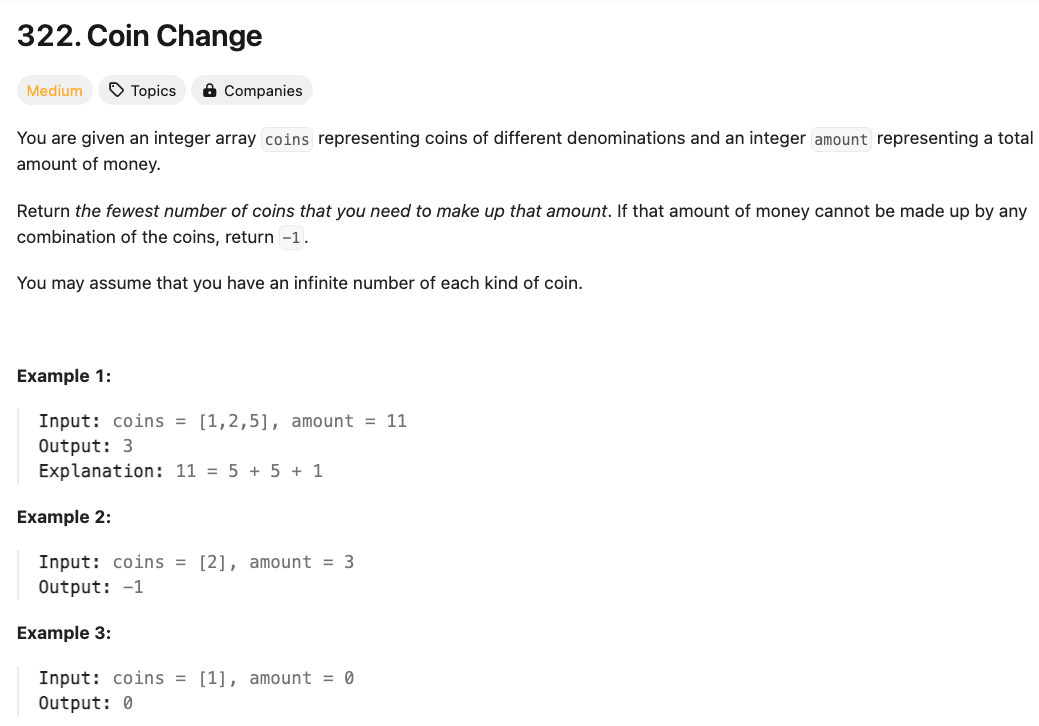

In [1]:
coins = [1,2,5]
amount = 11

In [9]:
dp = [999999 for _ in range(amount)]
dp[0] = 0
for i in range(1, len(coins)+1):
    for j in range(coins[i-1], amount+1):
        dp[j] = min(dp[j-coins[i-1]]+1, dp[j])
        print(dp)

[0, 1, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


IndexError: list index out of range

In [15]:
size = len(coins)
dp = [999999 for _ in range(amount + 1)]
dp[0] = 0

# 枚举前 i 种物品
for i in range(1, size + 1): # i = 1 
    # 正序枚举背包装载重量
    for c in range(coins[i - 1], amount + 1): # coin[0] = 1
        dp[c] = min(dp[c], dp[c - coins[i - 1]] + 1)
        print(dp)

[0, 1, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 999999, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 999999, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 999999, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 999999, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 999999, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 999999, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 999999, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 999999]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 6, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 7, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 8, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 9, 10, 11]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 10, 11]
[0,

In [18]:
class Solution(object):
    def coinChange(self, coins, amount):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        dp = [float("inf")]*(amount+1)
        dp[0] = 0
        for coin in coins:
            for i in range(coin, amount+1):
                dp[i] = min(dp[i], dp[i-coin]+1)
        if dp[amount] == float("inf"):
            return -1
        return dp[amount]

可以将这个问题理解为一个典型的动态规划问题，其本质类似于“装满背包”的过程。
思路是：对于每一种硬币（coin）进行遍历，在已有最优解的基础上，尝试使用当前硬币来更新每一个目标金额，使得所需硬币数尽可能少。

具体来说，初始化时，我们将金额为0时的最小硬币数设为0（因为什么都不需要放），其他金额初始化为一个较大的值（表示无法到达）。例如，目标金额为12。

首先，遍历第一个硬币（比如coin=1）。对于目标金额1到12的每一个值，由于当前只有1元的硬币，因此每个金额只能使用1元硬币来累加：

金额1需要1个1元硬币

金额2需要2个1元硬币

以此类推，到金额12时需要12个1元硬币

这是第一轮循环得到的最优解。

接着，遍历第二个硬币（比如coin=4）。我们再次更新从4到12每一个金额对应的最小硬币数。具体更新规则是：

对于当前目标金额j，如果 j >= coin，则我们比较两种情况：

之前已经计算好的dp[j]（不使用当前硬币）

dp[j - coin] + 1（使用当前硬币，再加上之前凑出j-coin金额所需的最少硬币数 + 当前这枚新硬币）

取两者的最小值作为新的dp[j]。

举例：

对于金额4，dp[4] = min(dp[4], dp[0] + 1)，即使用一枚4元硬币，所需硬币数是1，比原来使用4枚1元硬币（4个）更优，更新为1。

对于金额5，dp[5] = min(dp[5], dp[1] + 1)，即在金额1的基础上再加一枚4元硬币，总共需要2个硬币，比原来使用5枚1元硬币（5个）更少，更新为2。

以此类推，直到遍历所有硬币，最终在目标金额处得到最少硬币数的最优解。



我们可以使用一个树状图来表示, 那么这是一个递归的问题，从0开始一直向上遍历
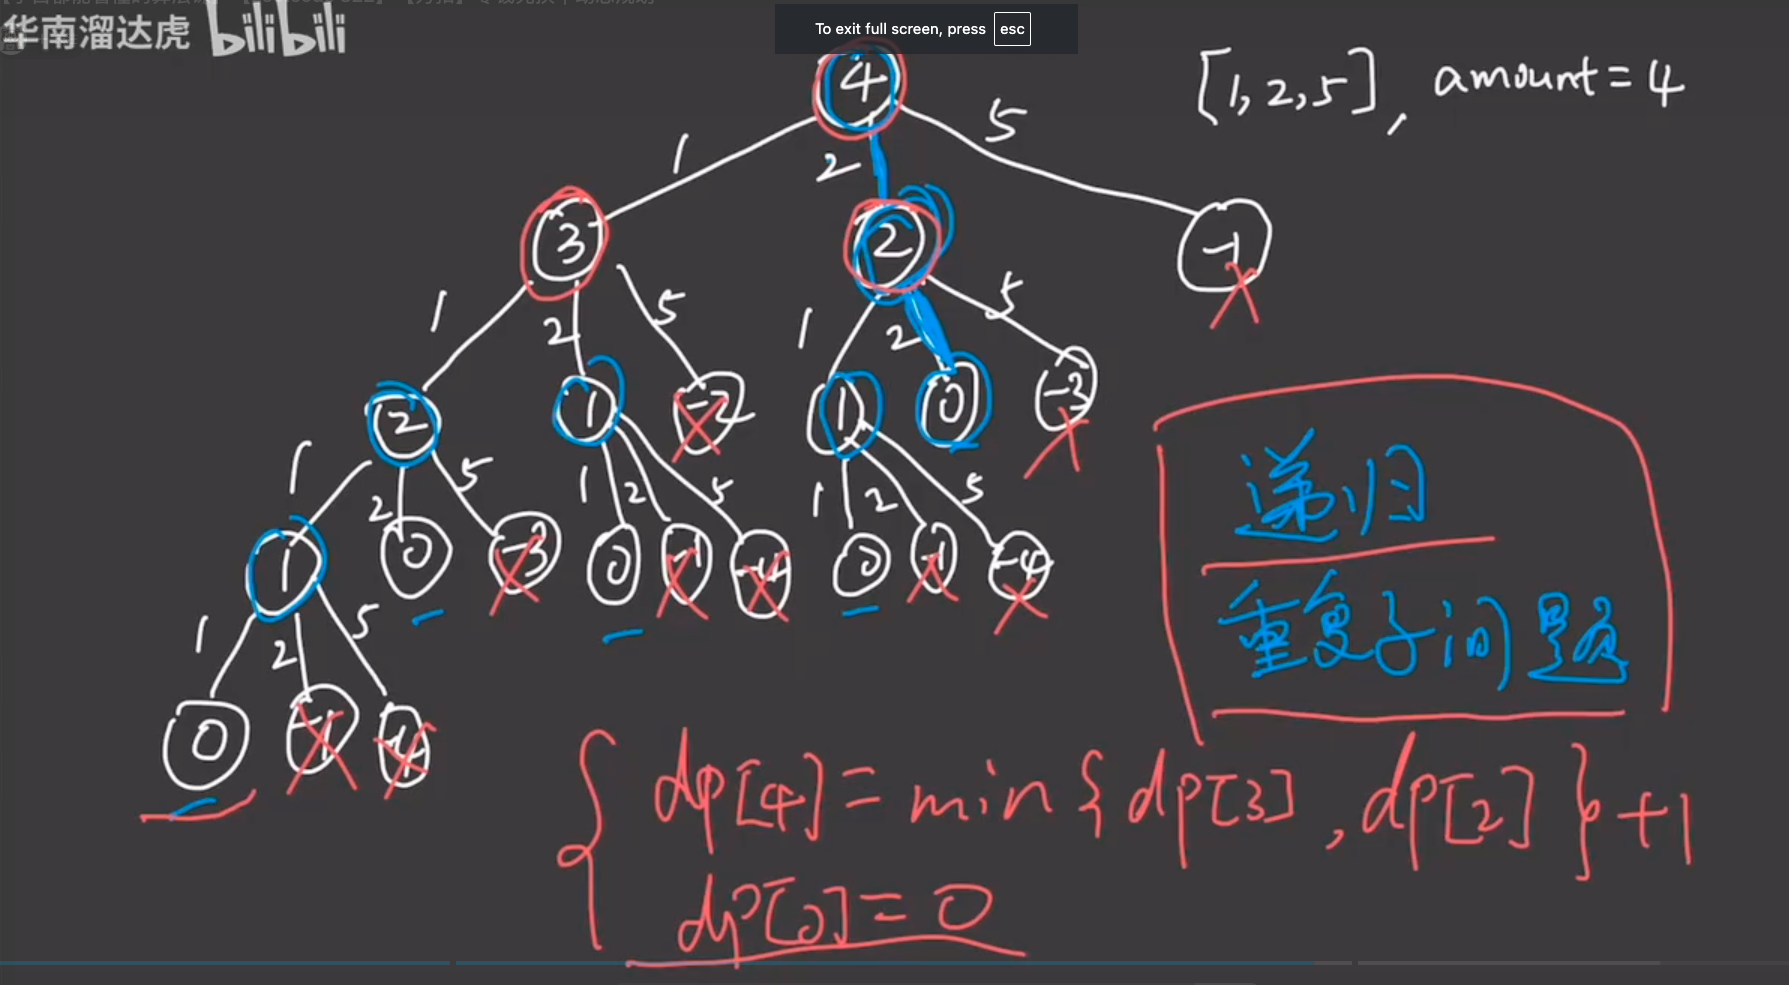